In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/Global Crude Petroleum Trade 1995-2021.csv')
df.head()

,Continent,Country,Trade Value,Year,Action
0,Africa,Angola,2.767000e+10,2021,Export
1,Africa,Botswana,2.055000e+03,2021,Export
2,Africa,Cote d'Ivoire,4.447282e+08,2021,Export
3,Africa,Cameroon,1.865465e+09,2021,Export
4,Africa,Democratic Republic of the Congo,5.815086e+08,2021,Export


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Continent    7925 non-null   object 
 1   Country      7925 non-null   object 
 2   Trade Value  7925 non-null   float64
 3   Year         7925 non-null   int64  
 4   Action       7925 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 309.7+ KB


In [4]:
df.describe()

,Trade Value,Year
count,7.925000e+03,7925.000000
mean,5.365169e+09,2008.589148
std,1.940226e+10,7.569435
min,1.000000e+00,1995.000000
25%,1.416080e+05,2002.000000
50%,8.549274e+07,2009.000000
75%,1.828030e+09,2015.000000
max,3.283380e+11,2021.000000


In [5]:
df.isnull().sum()

,0
Continent,0
Country,0
Trade Value,0
Year,0
Action,0


In [6]:
df.shape

(7925, 5)

Detect outliers

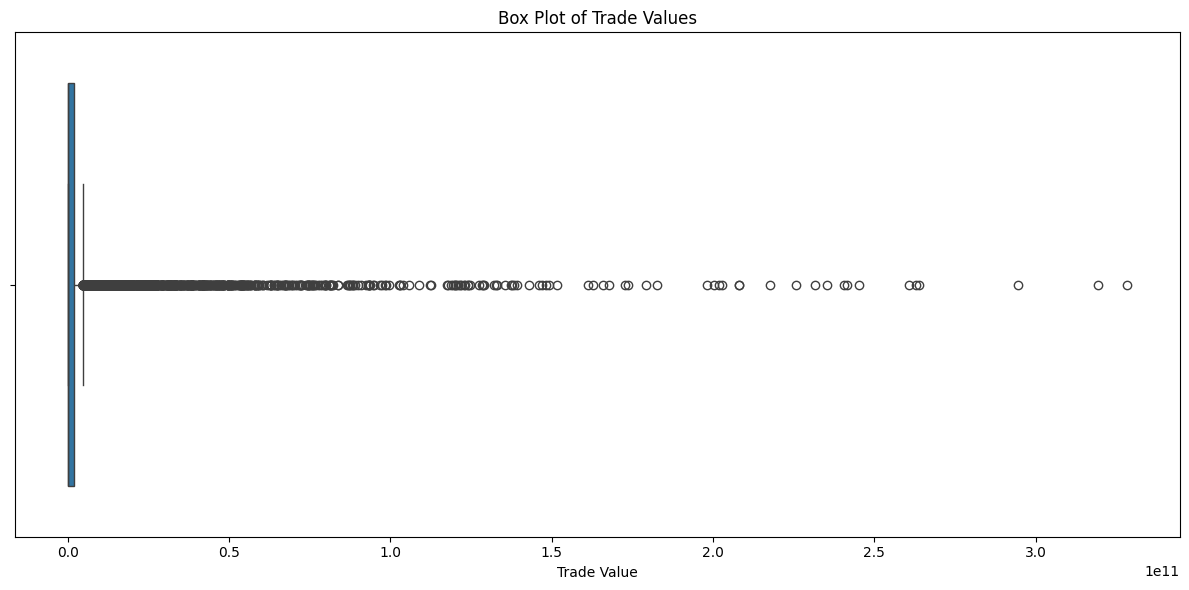

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create box plots for each numeric column to detect outliers
plt.figure(figsize=(12, 6))

# Plot box plot for Trade Value column
plt.subplot(1, 1, 1)
sns.boxplot(x=df['Trade Value'])
plt.title('Box Plot of Trade Values')
plt.xlabel('Trade Value')

plt.tight_layout()
plt.show()


In [8]:
import numpy as np

# Detect outliers using the IQR method
Q1 = df['Trade Value'].quantile(0.25)
Q3 = df['Trade Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Trade Value'] >= lower_bound) & (df['Trade Value'] <= upper_bound)]


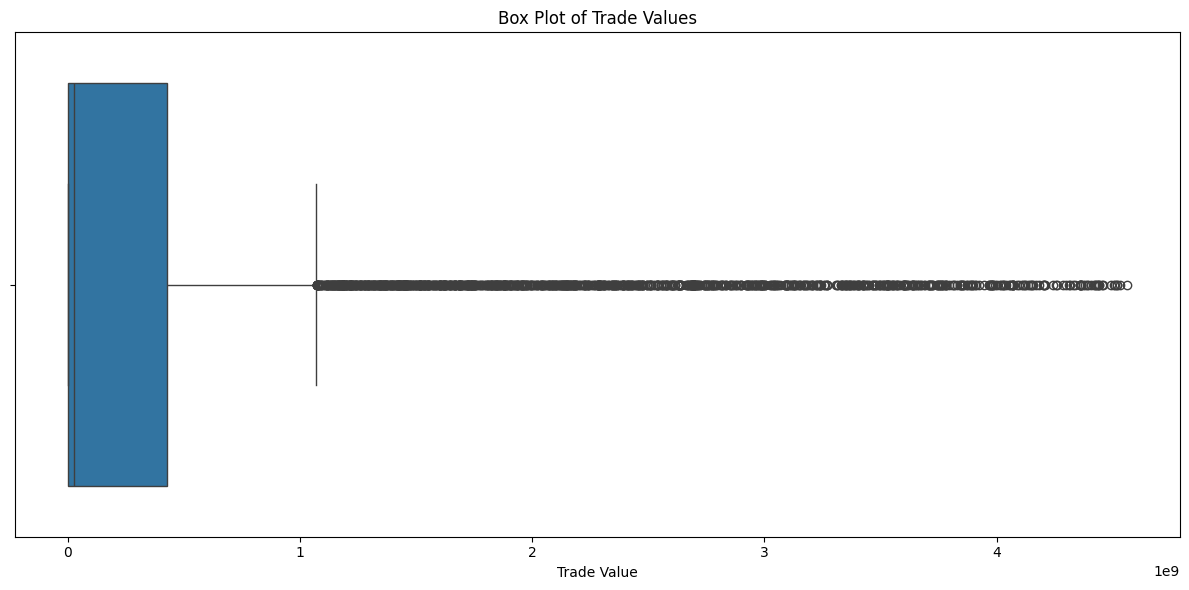

In [9]:
# Create box plots for each numeric column to detect outliers
plt.figure(figsize=(12, 6))

# Plot box plot for Trade Value column
plt.subplot(1, 1, 1)
sns.boxplot(x=df['Trade Value'])
plt.title('Box Plot of Trade Values')
plt.xlabel('Trade Value')

plt.tight_layout()
plt.show()


  Continent                           Country   Trade Value  Year  Action
0    Africa                            Angola  2.767000e+10  2021  Export
1    Africa                          Botswana  2.055000e+03  2021  Export
2    Africa                     Cote d'Ivoire  4.447282e+08  2021  Export
3    Africa                          Cameroon  1.865465e+09  2021  Export
4    Africa  Democratic Republic of the Congo  5.815086e+08  2021  Export
Edge added: Africa -> Asia with weight 3517983260038.0 (Action: Export)
Edge added: Africa -> Europe with weight 3517983260038.0 (Action: Export)
Edge added: Africa -> North America with weight 3517983260038.0 (Action: Export)
Edge added: Africa -> Oceania with weight 3517983260038.0 (Action: Export)
Edge added: Africa -> South America with weight 3517983260038.0 (Action: Export)
Edge added: Africa -> Antarctica with weight 3517983260038.0 (Action: Export)
Edge added: Asia -> Africa with weight 9840708390207.0 (Action: Export)
Edge added: Asia -> Eur

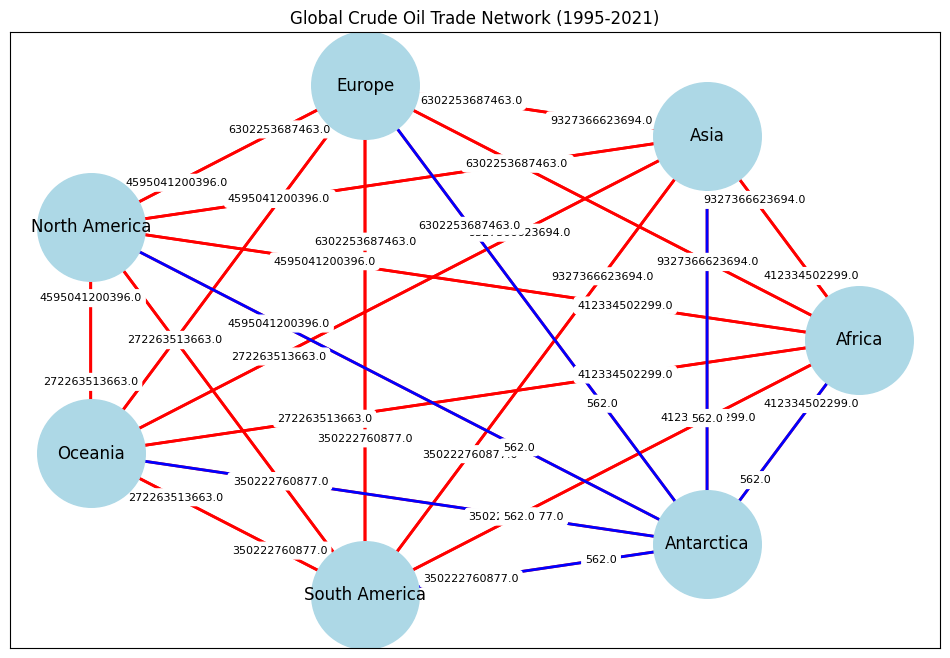

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Global Crude Petroleum Trade 1995-2021.csv')

# Print a sample of the data to verify
print(df.head())

# Adjust column names based on the dataset
continent_column = 'Continent'
trade_value_column = 'Trade Value'
action_column = 'Action'

# Create a directed graph
G = nx.DiGraph()

# Define colors for export and import edges
export_color = 'blue'
import_color = 'red'

# Iterate through each unique action
for action in df[action_column].unique():
    for source_continent in df[continent_column].unique():
        # Filter the data for this source continent and action
        filtered_df = df[(df[continent_column] == source_continent) & (df[action_column] == action)]
        if filtered_df.empty:
            continue
        for target_continent in df[continent_column].unique():
            if source_continent != target_continent:
                # Sum the trade value for this pair of continents
                trade_value = filtered_df[trade_value_column].sum()
                if trade_value > 0:
                    color = export_color if action == 'Export' else import_color
                    G.add_edge(source_continent, target_continent, weight=trade_value, color=color)
                    print(f"Edge added: {source_continent} -> {target_continent} with weight {trade_value} (Action: {action})")

# Check if the graph has nodes and edges
print(f"Nodes: {G.nodes()}")
print(f"Edges: {G.edges(data=True)}")

# Draw the graph if there are any edges
if len(G.edges) > 0:
    pos = nx.circular_layout(G)  # Change layout for better visual representation
    plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=6000, node_color='lightblue')

    # Draw edges with colors based on action type
    edges = G.edges()
    colors = [G[u][v]['color'] for u, v in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color=colors, arrows=True, arrowstyle='->')

    # Draw labels for continents (nodes)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    # Draw edge labels (trade values) with horizontal alignment
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=8, rotate=False)

    plt.title('Global Crude Oil Trade Network (1995-2021)')
    plt.show()
else:
    print("No edges to display in the graph.")


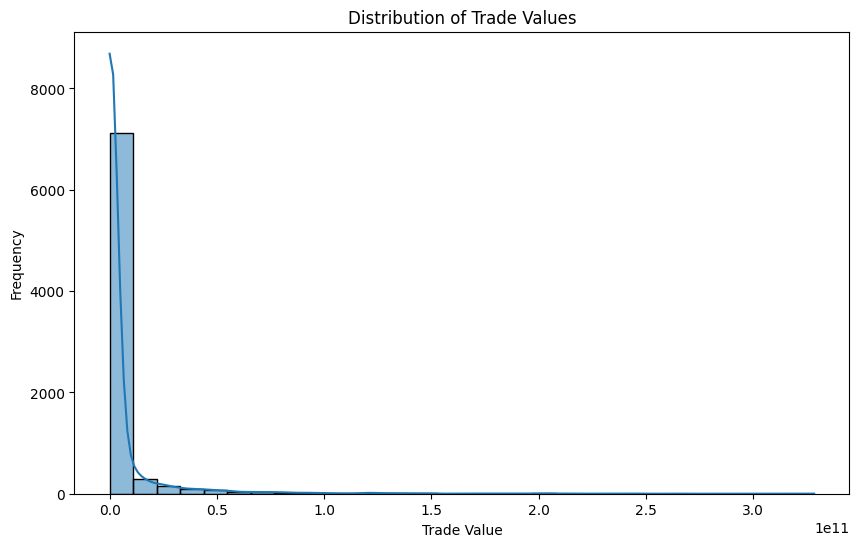

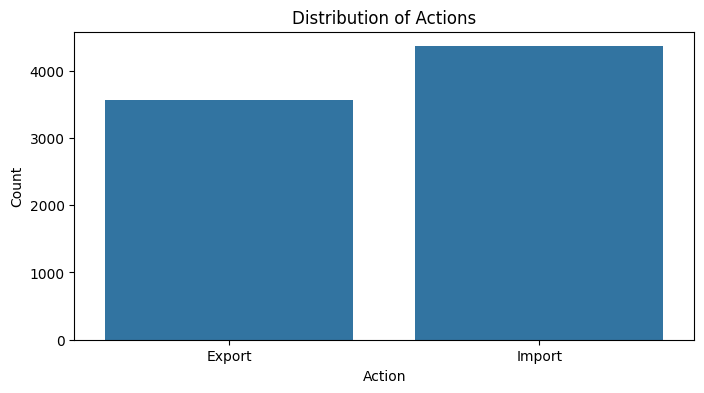

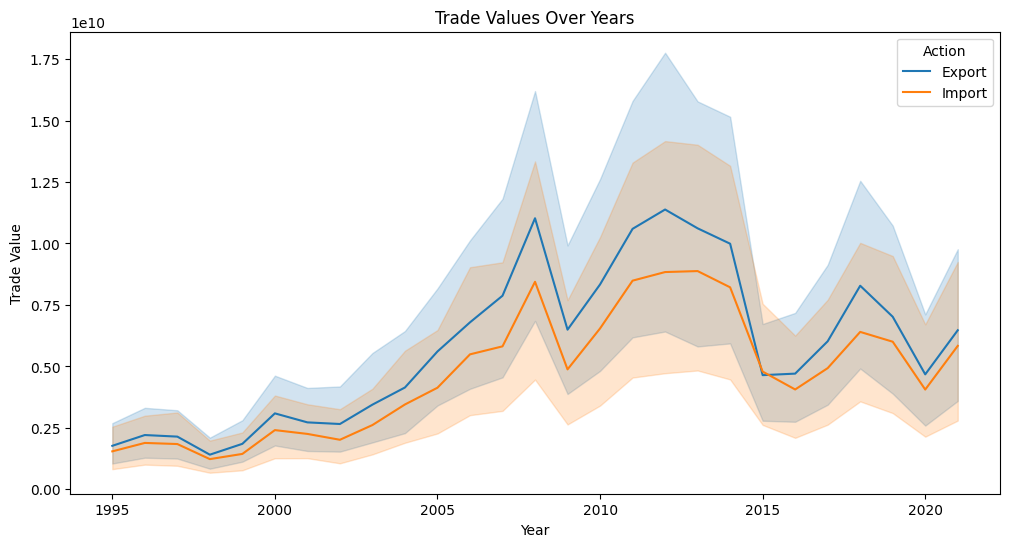

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of trade values
plt.figure(figsize=(10, 6))
sns.histplot(df[trade_value_column], bins=30, kde=True)
plt.title('Distribution of Trade Values')
plt.xlabel('Trade Value')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of actions
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=action_column)
plt.title('Distribution of Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

# Plot year-wise trade values
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y=trade_value_column, hue=action_column)
plt.title('Trade Values Over Years')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.show()


Dijkstra

Enter the source continent: Africa
Enter the destination continent: Antarctica
Shortest path from Africa to Antarctica: ['Africa', 'Antarctica']


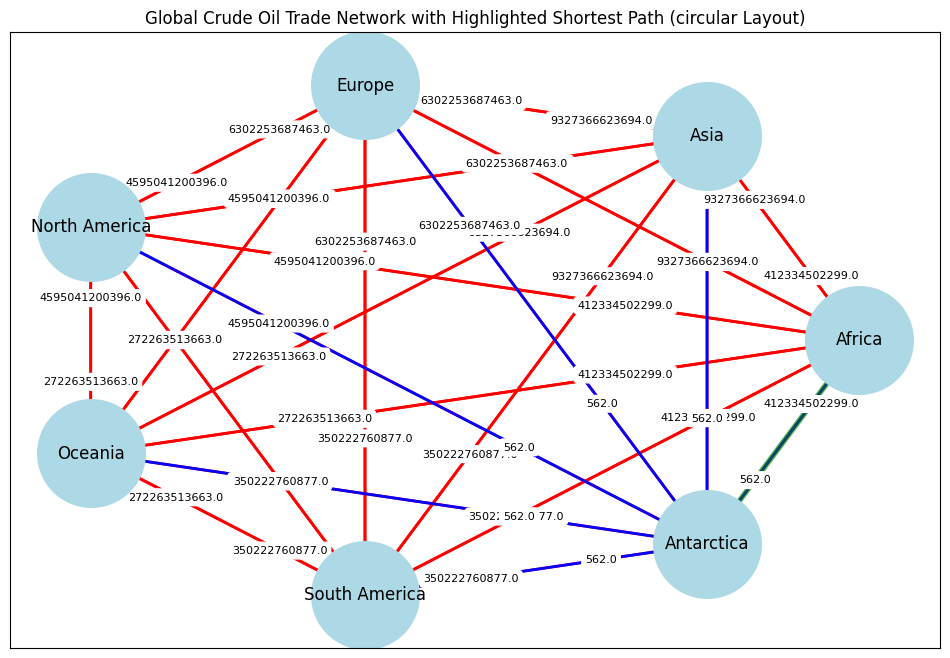

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your graph with edge weights

# Function to get user input for source and destination nodes
def get_user_input():
    source_node = input("Enter the source continent: ")
    target_node = input("Enter the destination continent: ")
    return source_node, target_node

 plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=6000, node_color='lightblue')

    # Draw edges
    edges = G.edges()
    edge_colors = [G[u][v].get('color', 'gray') for u, v in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color=edge_colors, arrows=True, arrowstyle='->')

    # Highlight the shortest path edges
    if path_edges:
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=4, alpha=0.6, arrows=True, arrowstyle='->')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    # Draw edge labels (trade values)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=8, rotate=False)

    plt.title(f'Global Crude Oil Trade Network with Highlighted Shortest Path ({layout} Layout)')
    plt.show()

# Main script
def main():
    # Get user input
    source_node, target_node = get_user_input()

    # Check if nodes exist
    if source_node in G.nodes and target_node in G.nodes:
        try:
            # Compute shortest path using Dijkstra's algorithm
            shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight='weight')
            print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")

            # Convert the shortest path to edges for highlighting
            path_edges = list(zip(shortest_path, shortest_path[1:]))

            # Plot the graph with the shortest path highlighted
            plot_graph_with_highlight(G, path_edges=path_edges)
        except nx.NetworkXNoPath:
            print(f"No path found between {source_node} and {target_node}.")
    else:
        print("Invalid source or destination node.")

if __name__ == "__main__":
    main()


Louvain Method

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.1 MB/s eta 0:00:00
Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'leidenalg', 'graph_tool', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}


<Figure size 1200x800 with 0 Axes>

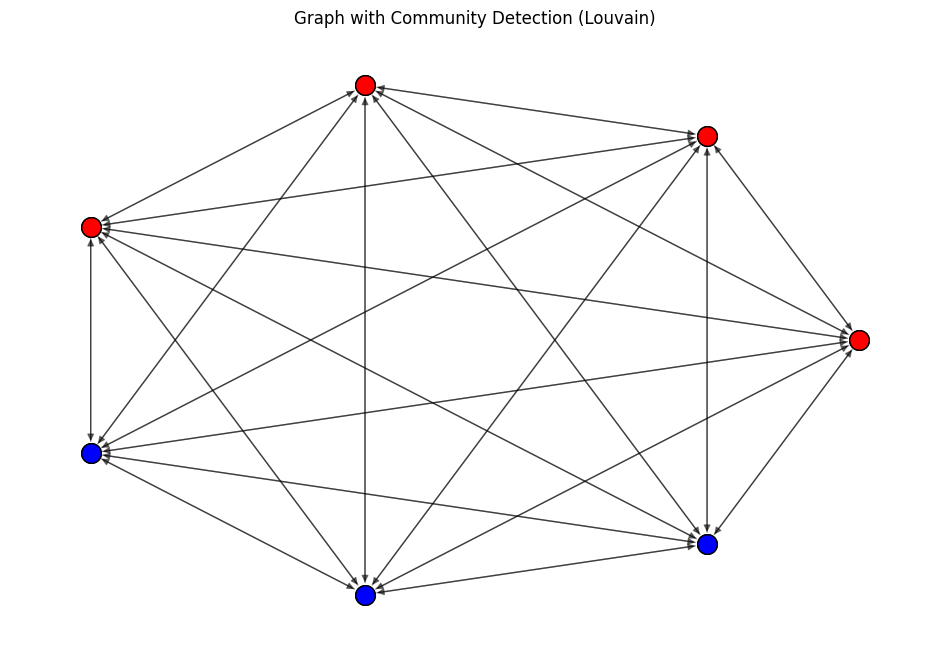

In [13]:
!pip install cdlib
from cdlib import algorithms, viz

# Compute the best partition for the graph using Louvain algorithm
partition = algorithms.louvain(G.to_undirected(), weight='weight')

# Draw the graph with communities
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)  # Position nodes using circular layout
viz.plot_network_clusters(G, partition, pos, figsize=(12, 8))
plt.title('Graph with Community Detection (Louvain)')
plt.show()

  Continent                           Country   Trade Value  Year  Action
0    Africa                            Angola  2.767000e+10  2021  Export
1    Africa                          Botswana  2.055000e+03  2021  Export
2    Africa                     Cote d'Ivoire  4.447282e+08  2021  Export
3    Africa                          Cameroon  1.865465e+09  2021  Export
4    Africa  Democratic Republic of the Congo  5.815086e+08  2021  Export
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Continent    7925 non-null   object 
 1   Country      7925 non-null   object 
 2   Trade Value  7925 non-null   float64
 3   Year         7925 non-null   int64  
 4   Action       7925 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 309.7+ KB
None
Linear Regression:
  Mean Squared Error: 296496647125145026560.00
  R2 Score: 0.36


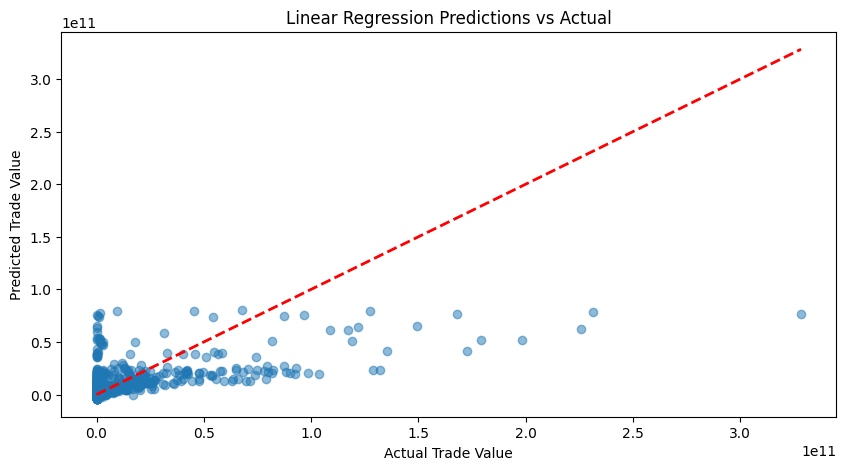

Decision Tree:
  Mean Squared Error: 41889324225852522496.00
  R2 Score: 0.91


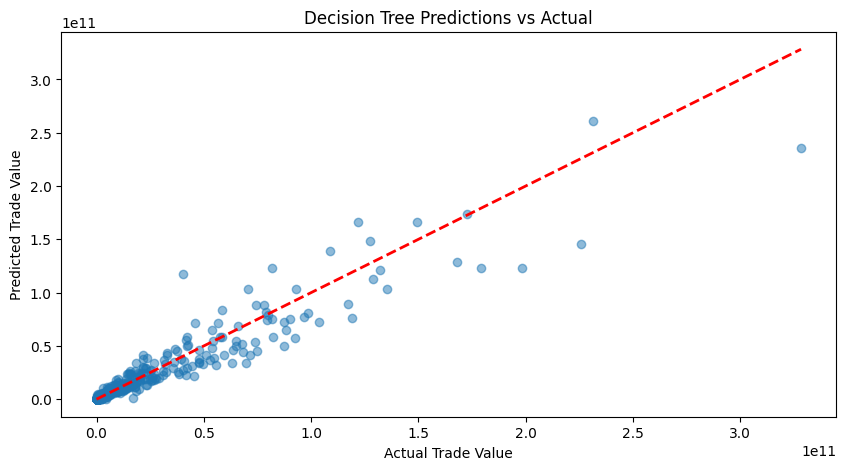

Random Forest:
  Mean Squared Error: 38375081547744796672.00
  R2 Score: 0.92


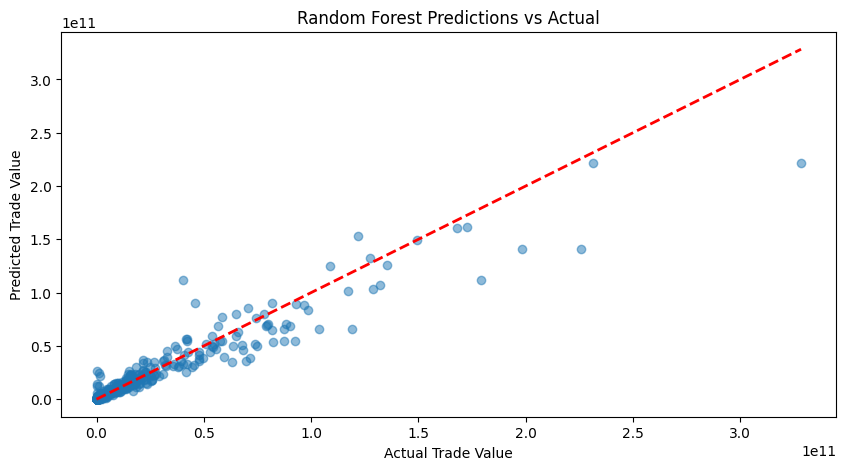

Enter the details for prediction:
Year (e.g., 2021): 2021
Continent (e.g., Africa, Asia): Africa
Country (e.g., Nigeria, China): Angola
Action (Export or Import): Export
Predicted Trade Value: $23,892,164,642.24


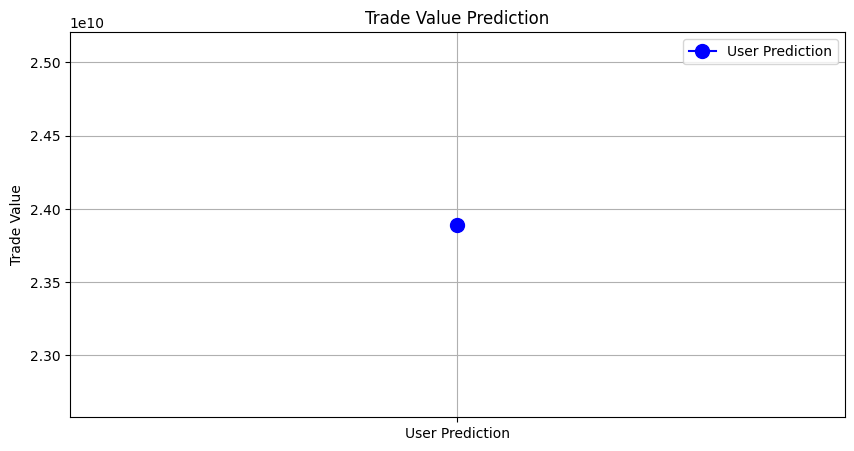

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/Global Crude Petroleum Trade 1995-2021.csv')

# Print the first few rows and columns info to check data types
print(df.head())
print(df.info())

# Preprocess the dataset
# Convert 'Year' to a numeric format
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Continent', 'Country', 'Action'], drop_first=True)

# Ensure 'Trade Value' is numeric
df['Trade Value'] = pd.to_numeric(df['Trade Value'], errors='coerce')

# Handle missing values if any
df = df.dropna()

# Define features and target
features = df.drop(['Trade Value'], axis=1)
target = df['Trade Value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R2 Score: {r2:.2f}")

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Trade Value')
    plt.ylabel('Predicted Trade Value')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.show()

# User input for prediction
def predict_trade_value(model, scaler, feature_names):
    # Get user input
    print("Enter the details for prediction:")
    year = int(input("Year (e.g., 2021): "))
    continent = input("Continent (e.g., Africa, Asia): ")
    country = input("Country (e.g., Nigeria, China): ")
    action = input("Action (Export or Import): ")

    # Prepare input data
    user_data = {
        'Year': [year],
        **{f'Continent_{continent}': [1] if f'Continent_{continent}' in feature_names else [0] for f in feature_names if f.startswith('Continent_')},
        **{f'Country_{country}': [1] if f'Country_{country}' in feature_names else [0] for f in feature_names if f.startswith('Country_')},
        **{f'Action_{action}': [1] if f'Action_{action}' in feature_names else [0] for f in feature_names if f.startswith('Action_')}
    }

    # Ensure all possible columns are in user_data
    for col in feature_names:
        if col not in user_data:
            user_data[col] = [0]

    user_df = pd.DataFrame(user_data)

    # Ensure the feature columns match
    user_df = user_df.reindex(columns=feature_names, fill_value=0)

    # Standardize the user input data
    user_df_scaled = scaler.transform(user_df)

    # Predict using the best model
    model_name = 'Random Forest'  # or any other model you prefer
    model = models[model_name]
    prediction = model.predict(user_df_scaled)

    print(f"Predicted Trade Value: ${prediction[0]:,.2f}")

    # Plot the prediction
    plt.figure(figsize=(10, 5))
    plt.plot(['User Prediction'], prediction, marker='o', markersize=10, color='b', label='User Prediction')
    plt.ylabel('Trade Value')
    plt.title('Trade Value Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

# Get the feature names used for training
feature_names = X_train.columns

# Call the function to get user input and predict
predict_trade_value(RandomForestRegressor(), scaler, feature_names)
